# Importing 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from scipy import constants
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt


In [4]:
def model_evaluation(model, xs):
    return np.array(list(map(model, xs)))

# Mathematical Model 

Using proportortional Controller for closed loop model. Two parameters "m" and "Ar" represent the mass and the area of the car. They are added to provide better flexibility when experimenting with the simulation and also provide an easier way to run multiple of them.  

In [5]:
# Mass of the car, kg
#m = 700

#Thrust Parameter , (N / %Pedal)
F_pedal = 30

#Density of Air, kg/m^3 
Rho = 1.225

#Cross-sectional Area of Car , m^2
# Ar = 5

#Drag Coefficient
Cd = 0.24

# Controller gain
K_c = 13.037
#K_c = 20.



In [6]:
def model_vehicle (V, t , m, Ar, st_func , dis_func):
    
    
    V_sp = st_func(t)
    theta = dis_func(t)
    
    
    drive = F_pedal * K_c * (V_sp - V)
    drag = 0.5 * Rho * Ar * Cd * (V**2)
    slope = constants.g * np.sin(theta)
    return (1. / m) * (drive - drag) - slope 
    
    
    


We define the time interval composed of 100 eqauly divided increasing values from 1 to 200

In [7]:
t = np.linspace(0, 200, 100)

In [8]:
t

array([  0.        ,   2.02020202,   4.04040404,   6.06060606,
         8.08080808,  10.1010101 ,  12.12121212,  14.14141414,
        16.16161616,  18.18181818,  20.2020202 ,  22.22222222,
        24.24242424,  26.26262626,  28.28282828,  30.3030303 ,
        32.32323232,  34.34343434,  36.36363636,  38.38383838,
        40.4040404 ,  42.42424242,  44.44444444,  46.46464646,
        48.48484848,  50.50505051,  52.52525253,  54.54545455,
        56.56565657,  58.58585859,  60.60606061,  62.62626263,
        64.64646465,  66.66666667,  68.68686869,  70.70707071,
        72.72727273,  74.74747475,  76.76767677,  78.78787879,
        80.80808081,  82.82828283,  84.84848485,  86.86868687,
        88.88888889,  90.90909091,  92.92929293,  94.94949495,
        96.96969697,  98.98989899, 101.01010101, 103.03030303,
       105.05050505, 107.07070707, 109.09090909, 111.11111111,
       113.13131313, 115.15151515, 117.17171717, 119.19191919,
       121.21212121, 123.23232323, 125.25252525, 127.27

Definitions of Set and Slope functions

In [9]:
def t_func(t):
        
    if t < 20:
        return 0
        
    if t >= 20 and t < 100:
        return 15
        
    if t >= 100 and t < 150:
        return 20
    
    if t >= 150:
        return 10
    
    
def slope_func(t):

    if t < 20:    
      return 0
        
         
    if t >= 20 and t < 100:
        return 1.5
        
    if t >= 100 and t < 150:
        return 2.0
    
    if t >= 150:
        return 3.0
        
def slope_func1(t):
        
    if t < 100:
        return 0
    
        
    if t >= 100:
        return 50
    
    
def slope_func2(t):
        
    if t < 20:
        return 0
        
         
    if t >= 20 and t < 100:
        return 1.875
        
    if t >= 100 and t < 150:
        return 2.5
    
    if t >= 150:
         return 3.75

def no_slope(t):
   return 0
     
    

# Simulation

The definition of the iterative simulation function while still providing mass and area flexiility through the "m" and "Ar" arguments

In [10]:
def sim(setpoint, slope, m , Ar):    
    initial = 0
    v_sim = [initial, ]

    for i in range(len(t) - 1):
        
        # take t[i] and t[i+1]
        t_pair = t[i:i+2]
        t_now, t_next = t_pair
        
        step_sim = odeint(model_vehicle, initial, t_pair, args=(m, Ar,setpoint, slope))

        # take the last value
        v_last = step_sim.reshape(-1)[-1]

        # appendt it to the resulting list
        v_sim.append(v_last)
        
        # save it as initial condition for the next run
        initial = v_last 
        
    v_sim = np.array(v_sim).reshape(-1)
    return v_sim

m = [600,700,800,900]
Ar= [5,6.25,7.50,8.75]
v_sim1 = []
v_sim2 = []
v_sim3 = []
v_sim4 = []

for x in range(len(m)):
  for y in range(len(Ar)):

    sim1 = sim(t_func, no_slope, m[x],Ar[y])
    sim2 = sim(t_func, slope_func, m[x],Ar[y])
    sim3 = sim(t_func, slope_func1, m[x],Ar[y])
    sim4 = sim(t_func, slope_func2, m[x],Ar[y])

    v_sim1.append(sim1)
    v_sim2.append(sim2)
    v_sim3.append(sim3)
    v_sim4.append(sim4)

len(v_sim1)


16

## Simulation Visualization

All 64 simulations are visualized and compared agains the set functions. As expected there is a lot of variability in the outcome of these simulations.

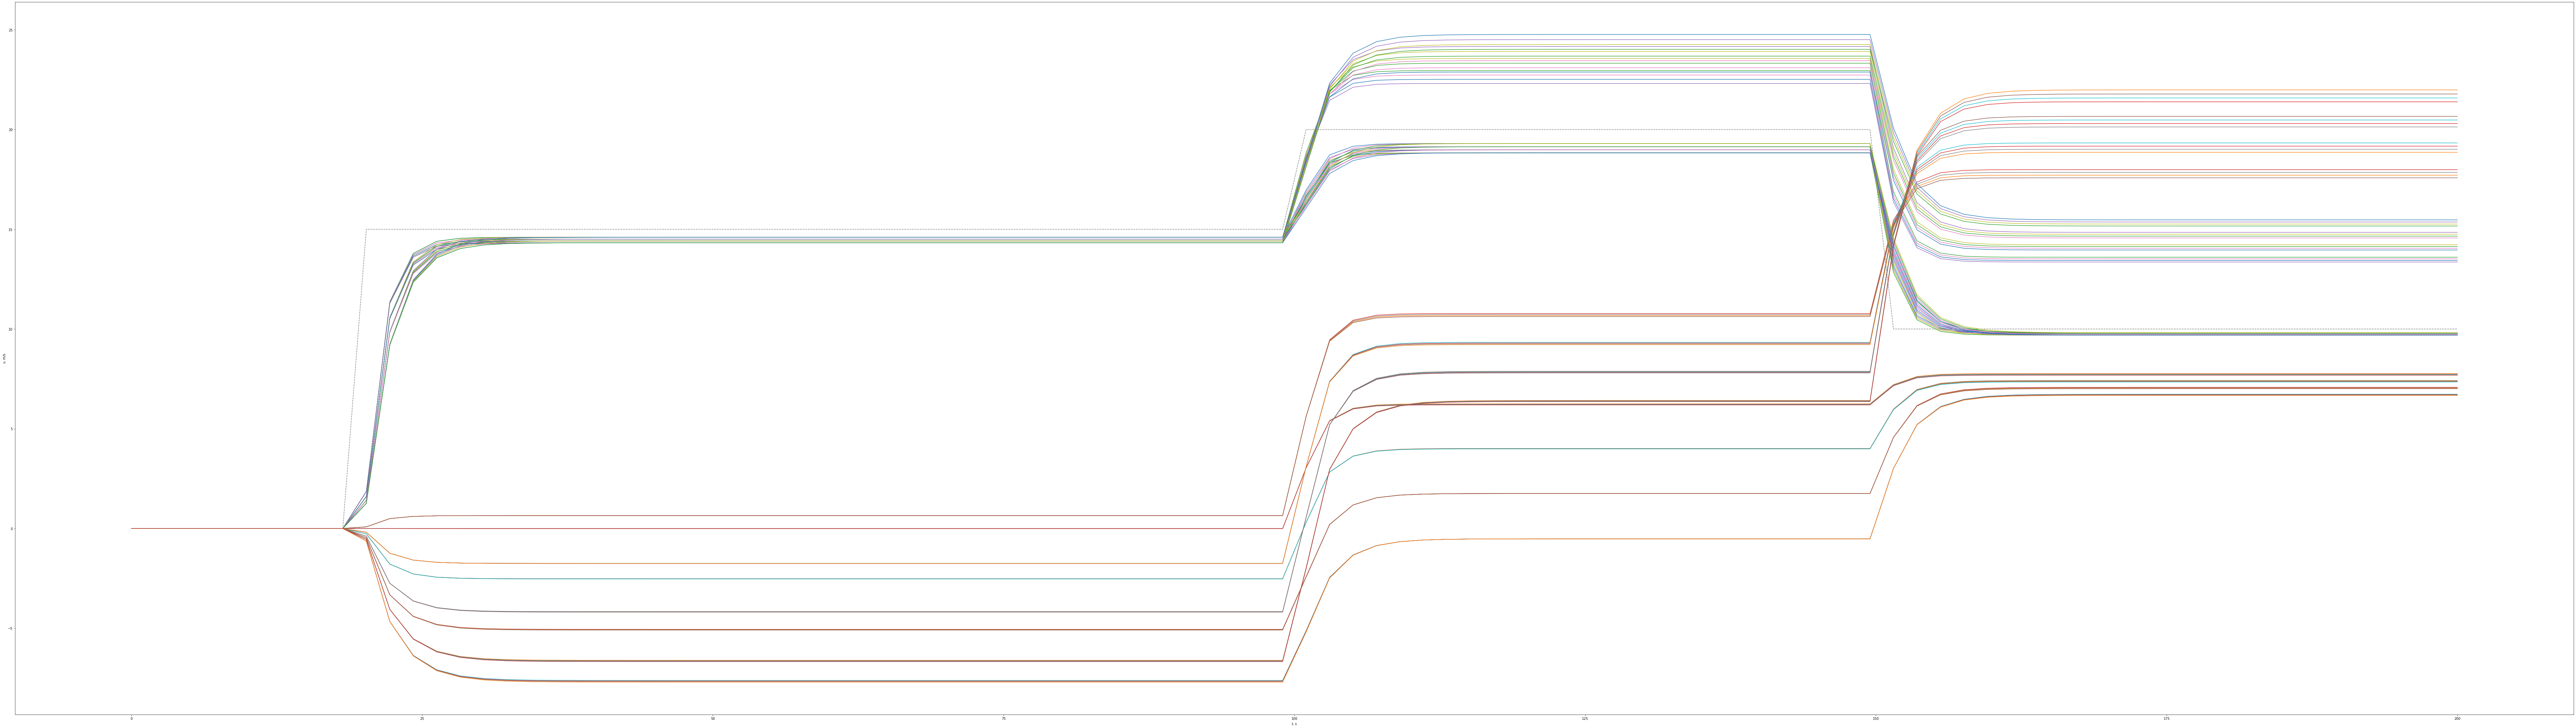

In [11]:
plt.figure(figsize=(140, 40))
plt.plot(t, model_evaluation(t_func, t), '--', color= 'gray')

for j in range(len(v_sim1)):
  plt.plot(t, v_sim1[j])
  plt.plot(t, v_sim2[j])
  plt.plot(t, v_sim3[j])
  plt.plot(t, v_sim4[j])


plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()

In [12]:
v_sim1,v_sim2,v_sim3,v_sim4

([array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.85048594, 11.36609662, 13.78989563, 14.39741192, 14.54906661,
         14.58688589, 14.59631474, 14.59866534, 14.59925122, 14.59939736,
         14.59943376, 14.5994429 , 14.59944513, 14.59944568, 14.59944594,
         14.59944591, 14.59944593, 14.5994459 , 14.59944592, 14.5994459 ,
         14.59944592, 14.5994459 , 14.59944593, 14.59944591, 14.59944593,
         14.5994459 , 14.59944592, 14.5994459 , 14.59944592, 14.5994459 ,
         14.59944593, 14.5994459 , 14.59944593, 14.59944591, 14.59944593,
         14.5994459 , 14.59944592, 14.5994459 , 14.59944592, 14.5994459 ,
         16.97047316, 18.73085868, 19.16126966, 19.26619884, 19.29176136,
         19.29798762, 19.29950415, 19.29987349, 19.29996345, 19.29998539,
         19.29999074, 19.29999206, 19.29999238, 19.29999246, 19.2999925 ,
         19.29999247, 19.29999251, 19.

## Calculating and visualizing the error for each simulation

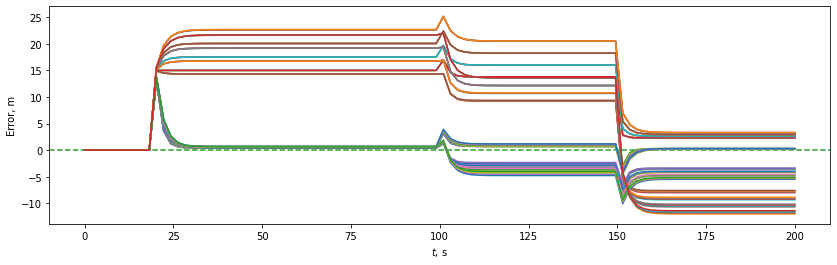

In [13]:
plt.figure(figsize=(14, 4))
plt.axhline(0, linestyle='--', color='tab:green')
for i in range(len(v_sim1)):
    error1 = model_evaluation(t_func, t) - v_sim1[i]
    error2 = model_evaluation(t_func, t) - v_sim2[i]
    error3 = model_evaluation(t_func, t) - v_sim3[i]
    error4 = model_evaluation(t_func, t) - v_sim4[i]
    plt.plot(t, error1)
    plt.plot(t, error2)
    plt.plot(t, error3)
    plt.plot(t, error4)
  
plt.xlabel('$t$, s')
plt.ylabel('Error, m')
plt.show()

In [16]:
print("Sum of squared errors during simulations:")
for i in range(len(v_sim1)):
    error1 = model_evaluation(t_func, t) - v_sim1[i]
    error2 = model_evaluation(t_func, t) - v_sim2[i]
    error3 = model_evaluation(t_func, t) - v_sim3[i]
    error4 = model_evaluation(t_func, t) - v_sim4[i]
    sse1 = np.sum(np.square(error1))
    sse2 = np.sum(np.square(error2))
    sse3 = np.sum(np.square(error3))
    sse4 = np.sum(np.square(error4))
    print(sse1)
    print(sse2)
    print(sse3)
    print(sse4)
    

Sum of squared errors during simulations:
227.42039211663416
13995.406875736213
765.1481995691111
12095.981323486129
237.2221733382855
14009.832314559135
722.2643838466984
12065.400176026445
248.6910733404491
14024.143015032785
684.0824586098904
12036.980605906025
261.6802074473723
14038.340602079188
650.2022959020527
12010.571231802722
248.5000531934746
18926.743872028157
1010.2460715175575
16317.303201241699
258.16082491117885
18939.273718450942
954.6286507252338
16268.18941079976
269.48917443260854
18951.776841614264
904.4620642128382
16222.16127672391
282.338505859501
18964.253715465504
859.2811965966717
16178.9998748256
269.4480837715471
24648.308312136047
1291.9598085473447
21189.018853905258
278.96165890969525
24671.513553232344
1222.440311632917
21126.918248876067
290.14331331536147
24694.893673211234
1159.2003819614981
21069.10342548912
302.84675486660194
24718.452314967522
1101.7018426178174
21015.271280384717
290.3808978149458
31177.567238685762
1609.7463590101743
26717.9469